#  **Build the Image classification model by dividing the model into following 4 stages**

 a. Loading and preprocessing the image data

 b.  Defining the model’s architecture

 c. Training the model

 d.  Estimating the model’s performance



# **Import Neccessary Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# **Load the dataset** ---- **CIFAR**


In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
#2D array can be reshaped into 1D array using reshape(-1)
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(x, y, index):
    plt.figure(figsize = (20,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

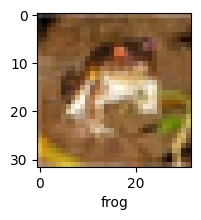

In [15]:
plot_sample(x_train, y_train, 0)

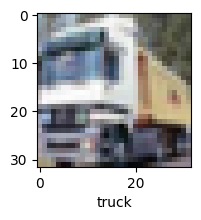

In [16]:
plot_sample(x_train, y_train, 1)

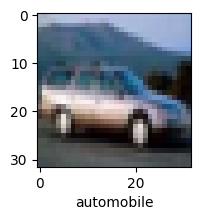

In [17]:
plot_sample(x_train, y_train, 4)

# **Normalizing the training data**

In [18]:

x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:

x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# **Build simple artificial neural network for image classification**

In [20]:
#Define network architecture of your model
annmodel = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])


In [21]:
#compile model using optimizer
annmodel.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:

annmodel.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8405 - accuracy: 0.3425
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6543 - accuracy: 0.4147
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5711 - accuracy: 0.4454
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5135 - accuracy: 0.4653
Epoch 5/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4626 - accuracy: 0.4863


# **NOTE - You can see that at the end of 5 epochs, accuracy is at around 48% using ANN.**

# **Now we will see the accuracy using CNN**

# **Build a convolutional neural network to train our images**

In [23]:
#define cnn network architecture
cnnmodel = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnnmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
history=cnnmodel.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4784 - accuracy: 0.4685 - val_loss: 1.3068 - val_accuracy: 0.5340
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1127 - accuracy: 0.6093 - val_loss: 1.0597 - val_accuracy: 0.6328
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9861 - accuracy: 0.6580 - val_loss: 1.0087 - val_accuracy: 0.6457
Epoch 4/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.9039 - accuracy: 0.6859 - val_loss: 1.0036 - val_accuracy: 0.6570
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8441 - accuracy: 0.7086 - val_loss: 0.9396 - val_accuracy: 0.6867
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7930 - accuracy: 0.7248 - val_loss: 0.9649 - val_accuracy: 0.6718
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7451 - accuracy: 0.7412 - val_loss: 0.9608 -

In [26]:
cnnmodel.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9368 - accuracy: 0.6933


[0.9367671012878418, 0.6933000087738037]

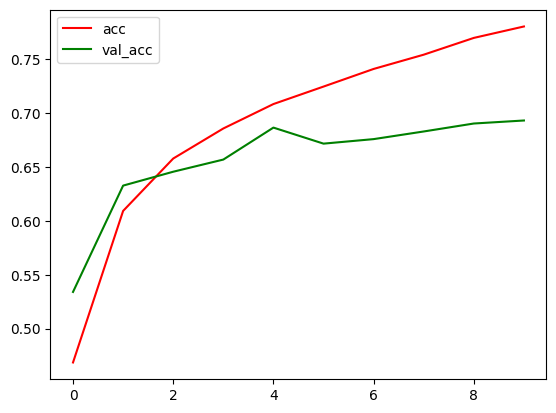

In [27]:
plt.plot(history.history['accuracy'],label='acc', color='red')
plt.plot(history.history['val_accuracy'],label='val_acc', color='green')
plt.legend()


In [29]:
y_pred = cnnmodel.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[4.9053663e-03, 1.3517593e-05, 9.8128419e-04, 7.8043401e-01,
        2.6252036e-04, 6.1672707e-03, 1.1276563e-01, 4.6353243e-06,
        9.4421983e-02, 4.3795579e-05],
       [2.9113698e-03, 5.1672661e-01, 2.5115403e-06, 6.7055081e-09,
        2.4157263e-09, 2.6693916e-11, 1.1131268e-07, 1.3546267e-09,
        4.8034266e-01, 1.6716645e-05],
       [5.8724221e-02, 4.7954768e-01, 1.0965754e-03, 2.7649242e-02,
        9.1134029e-04, 8.6497853e-04, 2.8417569e-03, 1.4507715e-03,
        4.1120249e-01, 1.5710969e-02],
       [9.1892207e-01, 5.9674509e-05, 5.8359904e-03, 9.4431613e-05,
        2.8939260e-06, 1.1958547e-06, 1.3320753e-04, 1.1267276e-06,
        7.4914150e-02, 3.5394911e-05],
       [6.0528708e-07, 4.0409506e-07, 1.9971324e-02, 1.7024247e-02,
        3.8799345e-01, 3.2088377e-03, 5.7177895e-01, 2.1073682e-05,
        9.9928866e-07, 6.2294809e-08]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

In [31]:

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

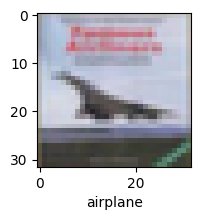

In [38]:

plot_sample(x_test, y_test,3)

In [39]:
classes[y_classes[3]]

'airplane'

In [40]:

cnnmodel.save('cnnmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#**Conclusion:**

With CNN, at the end of 10 epochs, training accuracy  is a significant improvement over ANN. CNN's are best for image classification and gives good accuracy. Also computation is much less compared to ANN as maxpooling reduces the image dimensions while still preserving the features

Try this too

https://github.com/Anita-2/Deep-Learning/blob/main/Assignment-03-Deep%20Learning-Handwritten%20Digit%20Recognition%20using%20CNN%20(2).ipynb